In [9]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

In [2]:
# device config
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [3]:
# hyperparameters
input_size = 784
hidden_size = 100
num_classes = 10
num_epochs = 10
batch_size = 100
learning_rate = 0.001

In [6]:
train_data = pd.read_csv(r"D:\IIT\SoC\Kaggle_MNIST_FNN\train.csv")
print(train_data.shape)
X_train = torch.tensor(train_data.iloc[:,1:].values, dtype=torch.float32)
print(X_train.shape)
Y_train = torch.tensor(train_data.iloc[:,0:1].values, dtype = torch.float32)
print(Y_train.shape)

data = torch.utils.data.TensorDataset(X_train,Y_train)
data[0]

(42000, 785)
torch.Size([42000, 784])
torch.Size([42000, 1])


(tensor([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         188., 255.,  94.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,  

In [7]:
data_loader = torch.utils.data.DataLoader(dataset = data, batch_size=batch_size, shuffle = True)

torch.Size([42000, 1])


torch.Size([784])


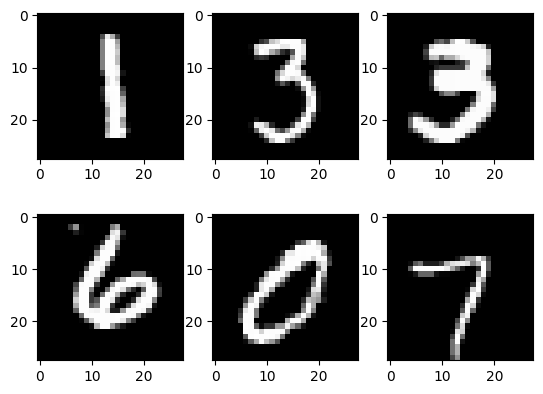

torch.Size([100, 784])


In [21]:
examples = iter(data_loader)
samples, labels = next(examples)
print(samples[0].shape)
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(samples[i].reshape(28,28), cmap = 'gray')
plt.show()
print(samples.shape)

In [59]:
class ConvNeuralNet(nn.Module):
    def __init__(self,num_classes):
        super(ConvNeuralNet,self).__init__()
        self.conv_layer1 = nn.Conv2d(in_channels= 1, out_channels=32, kernel_size=3)
        self.conv_layer2 = nn.Conv2d(in_channels= 32, out_channels=64, kernel_size=3)
        # self.max_pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        
        self.conv_layer3 = nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3)
        self.conv_layer4 = nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3)
        # self.max_pool2 = nn.MaxPool2d(kernel_size = 2, stride = 2)

        self.fc1 = nn.Linear(25600,128)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(128, num_classes)
    
    def forward(self,x):
        out = self.conv_layer1(x)
        out = self.conv_layer2(out)
        # out = self.max_pool1(out)
        
        out = self.conv_layer3(out)
        out = self.conv_layer4(out)
        # out = self.max_pool2(out)
                
        out = out.reshape(out.size(0), -1)
        
        out = self.fc1(out)
        out = self.relu1(out)
        out = self.fc2(out)
        return out

In [60]:
model = ConvNeuralNet(num_classes)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params = model.parameters(), lr=learning_rate)

In [61]:
for i, (images,labels) in enumerate(data_loader):
    print(images.reshape(-1,1,28,28).shape)

torch.Size([100, 1, 28, 28])
torch.Size([100, 1, 28, 28])
torch.Size([100, 1, 28, 28])
torch.Size([100, 1, 28, 28])
torch.Size([100, 1, 28, 28])
torch.Size([100, 1, 28, 28])
torch.Size([100, 1, 28, 28])
torch.Size([100, 1, 28, 28])
torch.Size([100, 1, 28, 28])
torch.Size([100, 1, 28, 28])
torch.Size([100, 1, 28, 28])
torch.Size([100, 1, 28, 28])
torch.Size([100, 1, 28, 28])
torch.Size([100, 1, 28, 28])
torch.Size([100, 1, 28, 28])
torch.Size([100, 1, 28, 28])
torch.Size([100, 1, 28, 28])
torch.Size([100, 1, 28, 28])
torch.Size([100, 1, 28, 28])
torch.Size([100, 1, 28, 28])
torch.Size([100, 1, 28, 28])
torch.Size([100, 1, 28, 28])
torch.Size([100, 1, 28, 28])
torch.Size([100, 1, 28, 28])
torch.Size([100, 1, 28, 28])
torch.Size([100, 1, 28, 28])
torch.Size([100, 1, 28, 28])
torch.Size([100, 1, 28, 28])
torch.Size([100, 1, 28, 28])
torch.Size([100, 1, 28, 28])
torch.Size([100, 1, 28, 28])
torch.Size([100, 1, 28, 28])
torch.Size([100, 1, 28, 28])
torch.Size([100, 1, 28, 28])
torch.Size([10

In [64]:
n_total_steps = len(data_loader)
for epoch in range(num_epochs):
    for i, (images,labels) in enumerate(data_loader):
        images = images.reshape(-1,1,28,28).to(device)
        labels = labels.to(device)
        labels = labels.type(torch.LongTensor)
        model = model.to(device)
        y_pred = model(images)
        loss = criterion(y_pred, labels.view(100))

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if(i+1)%100 == 0:
            print(f'epoch {epoch+1} / {num_epochs}, step {i+1}/{n_total_steps}, loss = {loss.item():.4f}')


epoch 1 / 10, step 100/420, loss = 2.1245
epoch 1 / 10, step 200/420, loss = 1.5152
epoch 1 / 10, step 300/420, loss = 0.9559
epoch 1 / 10, step 400/420, loss = 0.4571
epoch 2 / 10, step 100/420, loss = 0.3880
epoch 2 / 10, step 200/420, loss = 0.4748
epoch 2 / 10, step 300/420, loss = 0.3232
epoch 2 / 10, step 400/420, loss = 0.2931
epoch 3 / 10, step 100/420, loss = 0.1721
epoch 3 / 10, step 200/420, loss = 0.2810
epoch 3 / 10, step 300/420, loss = 0.1945
epoch 3 / 10, step 400/420, loss = 0.2616
epoch 4 / 10, step 100/420, loss = 0.0465
epoch 4 / 10, step 200/420, loss = 0.1013
epoch 4 / 10, step 300/420, loss = 0.3064
epoch 4 / 10, step 400/420, loss = 0.1860
epoch 5 / 10, step 100/420, loss = 0.1547
epoch 5 / 10, step 200/420, loss = 0.3642
epoch 5 / 10, step 300/420, loss = 0.1980
epoch 5 / 10, step 400/420, loss = 0.0835
epoch 6 / 10, step 100/420, loss = 0.2552
epoch 6 / 10, step 200/420, loss = 0.0621
epoch 6 / 10, step 300/420, loss = 0.1889
epoch 6 / 10, step 400/420, loss =

In [66]:
test_set = pd.read_csv(r"D:\IIT\SoC\Kaggle_MNIST_FNN\test.csv")
X_test = torch.tensor(test_set.values, dtype=torch.float32)

In [69]:
ImageId = []
Labels = []
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    i=0
    for image in X_test:
        image = image.reshape(-1,1,28,28).to(device)
        outputs = model(image)

        _,predictions = torch.max(outputs,1)
        ImageId.append(i+1)
        Labels.append(predictions.item())
        i=i+1

In [70]:
df = pd.DataFrame({'ImageId': ImageId, 'Label':Labels})
df
df.to_csv('submission2.csv', index=False)